<center>
    <h1> DCS 530 : Final Project </h1>
</center>
<center>    
    <h2> "Are marriages made in heaven?" </h2> 
</center>

<center>
    <h3> Aniruddha Joshi </h3>
</center>

<center>
    <h4> Date: Aug 07, 2023 </h4>
</center>

Data set Reference : https://gssdataexplorer.norc.org/
    


A few months ago, one of my friends got engaged, and we celebrated with an engagement party at a nice restaurant. "It looks like your marriage is created in heaven," said one of my friends. This sentence made me wonder: Why do people say things like that? Are marriage truly created in heaven? If so, why do relationships end in divorce?
Is it possible to foresee whether a couple will be happy together forever? I choose to conduct some data analysis to find out. The link to the General Social Survey information found at https://gssdataexplorer.norc.org/adfdsf. 

In [44]:
#Download the required files for execution
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

### Import the required libraries

In [45]:
#import the required libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import thinkstats2
import thinkplot
import IPython.display

import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from scipy.stats import pearsonr
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


### Import the dataset

In [46]:
#Import datasets

dataset_gss = pd.read_csv('C:\\Users\\aniruddha.joshi\\OneDrive - Emerson\\Personal\\MS Data Science Emerson\\DCS 530\\Project\\result\\GSS-Data.csv')

In [47]:
# A quiick review of the data
dataset_gss

year   id_               hrs1        wrkslf        marital  \
0      1972     1  .i:  Inapplicable  Someone else  Never married   
1      1972     2  .i:  Inapplicable  Someone else        Married   
2      1972     3  .i:  Inapplicable  Someone else        Married   
3      1972     4  .i:  Inapplicable  Someone else        Married   
4      1972     5  .i:  Inapplicable  Someone else        Married   
...     ...   ...                ...           ...            ...   
72385  2022  3541                 48  Someone else  Never married   
72386  2022  3542                 50  Someone else        Married   
72387  2022  3543                 38  Someone else  Never married   
72388  2022  3544                 40  Someone else        Married   
72389  2022  3545                 40  Someone else        Married   

                 divorce                            spwrksta childs age educ  \
0      .i:  Inapplicable                   .i:  Inapplicable      0  23   16   
1                     NO                       KEEPING HOUSE      5  70   10   
2                     NO                    WORKING FULLTIME      4  48   12   
3                     NO                    WORKING FULLTIME      0  27   17   
4                     NO                    TEMP NOT WORKING      2  61   12   
...                  ...                                 ...    ...  ..  ...   
72385  .i:  Inapplicable  .x:  Not available in this release      0  22   12   
72386                YES  .x:  Not available in this release      2  29   19   
72387  .i:  Inapplicable  .x:  Not available in this release      1  32   15   
72388                 NO  .x:  Not available in this release      0  49   17   
72389                 NO  .x:  Not available in this release      1  50   20   

                                    spdeg     sex   race            family16  \
0                       .i:  Inapplicable  FEMALE  White              FATHER   
1                             HIGH SCHOOL    MALE  White   M AND F RELATIVES   
2                          .n:  No answer  FEMALE  White     MOTHER & FATHER   
3                                GRADUATE  FEMALE  White     MOTHER & FATHER   
4                             HIGH SCHOOL  FEMALE  White     MOTHER & FATHER   
...                                   ...     ...    ...                 ...   
72385  .x:  Not available in this release  FEMALE  White  MOTHER & STPFATHER   
72386  .x:  Not available in this release  FEMALE  White     MOTHER & FATHER   
72387  .x:  Not available in this release    MALE  White  MOTHER & STPFATHER   
72388  .x:  Not available in this release  FEMALE  White     MOTHER & FATHER   
72389  .x:  Not available in this release    MALE  White     MOTHER & FATHER   

                  income                             relig16  \
0      .i:  Inapplicable                   .i:  Inapplicable   
1      .i:  Inapplicable                   .i:  Inapplicable   
2      .i:  Inapplicable                   .i:  Inapplicable   
3      .i:  Inapplicable                   .i:  Inapplicable   
4      .i:  Inapplicable                   .i:  Inapplicable   
...                  ...                                 ...   
72385    $25,000 or more  .x:  Not available in this release   
72386    $25,000 or more  .x:  Not available in this release   
72387    $25,000 or more  .x:  Not available in this release   
72388    $25,000 or more  .x:  Not available in this release   
72389    $25,000 or more  .x:  Not available in this release   

                  hapmar             ballot          incomeUSD  
0      .i:  Inapplicable  .i:  Inapplicable  .i:  Inapplicable  
1      .i:  Inapplicable  .i:  Inapplicable  .i:  Inapplicable  
2      .i:  Inapplicable  .i:  Inapplicable  .i:  Inapplicable  
3      .i:  Inapplicable  .i:  Inapplicable  .i:  Inapplicable  
4      .i:  Inapplicable  .i:  Inapplicable  .i:  Inapplicable  
...                  ...                ...                ...  
72385  .i:  Inapplicable        

In [48]:
# Listing the available columns
data=dataset_gss.columns
df = pd.DataFrame(data)
df

0
0        year
1         id_
2        hrs1
3      wrkslf
4     marital
5     divorce
6    spwrksta
7      childs
8         age
9        educ
10      spdeg
11        sex
12       race
13   family16
14     income
15    relig16
16     hapmar
17     ballot
18  incomeUSD

# Vailable Definations

To find out if the couple will stay together happily forever lets analyze different sets of parametersm. Below is the explanation of each variable

    -ballot  :  ballot used for interview
    -hrs1    :  number of hours worked last week. To check if couples have a time for each other. 
    -wrkslf  :  self-emp or works for somebody. To check if they work for someone else.
    -marital :  marital status. The dependent varilable 1.
    -divorce :  ever been divorced or separated. The dependent varilable 2.
    -spwrksta:  spouse labor force status
    -childs  :  number of children. Checking the number of childrens helps couple to stay together.
    -age	 :  age of respondent. Is there any age factor in divorce.
    -educ	 :  highest year of school completed. Is education playing any role for couple to stay together.
    -spdeg	 :  spouse's highest degree. 
    -sex	 :  respondents sex. Are more males divorced than females?
    -race	 :  race of respondent. Are divorce % larger in any specific race?
    -family16:  living with parents when 16 yrs old. Staying long with parents helps achieve family bonding?
    -income	 :  total family income. Is there a role of income in happy marriages?
    -relig16 :  religion in which raised. Do certain religions having lesser % of divorce?
    -hapmar	 :  happiness of marriage. Dependant variable 3.
    -year	 :  GSS year for this respondent
    -incomUSD:  Income in USD
    -id_	 :  Respondent id number


## Clean up the Database

In [49]:
#Clean up the database
#Replaced invalid/incorrect strings with NaN
#This makes replacement in the complete database
dataset_gss.replace('.i:  Inapplicable', np.nan, inplace=True)
dataset_gss.replace('.d:  Do not Know/Cannot Choose', np.nan, inplace=True)
dataset_gss.replace('.f:  Missing Birthdate Information', np.nan, inplace=True)
dataset_gss.replace('.i:  Inapplicable', np.nan, inplace=True)
dataset_gss.replace('.j:  I do not have a job', np.nan, inplace=True)
dataset_gss.replace('.m:  DK, NA, IAP', np.nan, inplace=True)
dataset_gss.replace('.n:  No answer', np.nan, inplace=True)
dataset_gss.replace('.p:  Not applicable (I have not faced this decision)/Not imputable', np.nan, inplace=True)
dataset_gss.replace('.q:  Not imputable', np.nan, inplace=True)
dataset_gss.replace('.r:  Refused', np.nan, inplace=True)
dataset_gss.replace('.s:  Skipped on Web', np.nan, inplace=True)
dataset_gss.replace('.u:  Uncodable', np.nan, inplace=True)
dataset_gss.replace('.x:  Not available in this release', np.nan, inplace=True)
dataset_gss.replace('.y:  Not available in this year', np.nan, inplace=True)
dataset_gss.replace('.z:  Variable-specific reserve code', np.nan, inplace=True)
dataset_gss.replace('8 or more', int(8), inplace=True)
dataset_gss.replace('89 or older', int(89), inplace=True)
dataset_gss.replace('No formal schooling', int(0), inplace=True)



### Converting the columns to appropriate data format

In [50]:
#Convert fields to appropriate format
dataset_gss['hrs1'] = pd.to_numeric(dataset_gss['hrs1'], errors='coerce')
dataset_gss['wrkslf'] = dataset_gss['wrkslf'].astype('category')
dataset_gss['marital'] = dataset_gss['marital'].astype('category')
dataset_gss['divorce'] = dataset_gss['divorce'].astype('category')
dataset_gss['spwrksta'] = dataset_gss['spwrksta'].astype('category')
dataset_gss['childs'] = pd.to_numeric(dataset_gss['childs'], errors='coerce')
dataset_gss['age'] = pd.to_numeric(dataset_gss['age'], errors='coerce')
dataset_gss['educ'] = pd.to_numeric(dataset_gss['educ'], errors='coerce')
dataset_gss['spdeg'] = dataset_gss['spdeg'].astype('category')
dataset_gss['sex'] = dataset_gss['sex'].astype('category')
dataset_gss['race'] = dataset_gss['race'].astype('category')
dataset_gss['family16'] = dataset_gss['family16'].astype('category')
dataset_gss['income'] = dataset_gss['income'].astype('category')
dataset_gss['relig16'] = dataset_gss['relig16'].astype('category')
dataset_gss['hapmar'] = dataset_gss['hapmar'].astype('category')
dataset_gss['incomeUSD'] = pd.to_numeric(dataset_gss['incomeUSD'], errors='coerce')
dataset_gss['ballot'] = dataset_gss['ballot'].astype('string')



In [51]:
#QUick review of numeric fields
#descriptive characteristics about the variables: Mean, Mode, Spread, and Tail
dataset_gss.describe()

year           id_          hrs1        childs           age  \
count  72390.000000  72390.000000  41266.000000  72129.000000  71621.000000   
mean    1997.715541   1241.796395     40.843285      1.916538     46.555982   
std       15.109995    912.273245     13.584545      1.759511     17.600417   
min     1972.000000      1.000000      0.000000      0.000000     18.000000   
25%     1985.000000    534.000000     37.000000      0.000000     32.000000   
50%     1998.000000   1083.000000     40.000000      2.000000     44.000000   
75%     2010.000000   1722.000000     48.000000      3.000000     60.000000   
max     2022.000000   4510.000000     88.000000      8.000000     89.000000   

               educ     incomeUSD  
count  72127.000000  63439.000000  
mean      13.034633  25948.477378  
std        3.182372   9403.188921  
min        0.000000   1011.392793  
25%       12.000000  19058.115660  
50%       12.000000  30941.325100  
75%       16.000000  33203.877585  
max       20.000000  35499.895520

In [94]:
from tabulate import tabulate
data_calc = dataset_gss[['hrs1', 'age', 'educ','incomeUSD', 'childs']]
mean = data_calc.mean()
mode = data_calc.mode().iloc[0]  # Get the first row as mode
spread = data_calc.describe().loc[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
tails = data_calc.quantile([0.05, 0.95])

# Create a DataFrame to display the results in a tabular format
result_table = pd.DataFrame({
    'Statistic': ['Mean', 'Mode', 'Standard Deviation', 'Minimum', '25th Percentile', 'Median (50th Percentile)', '75th Percentile', 'Maximum', '5th Percentile', '95th Percentile'],
    'Hours Worked (hrs1)': [mean['hrs1'], mode['hrs1'], spread.loc['std', 'hrs1'], spread.loc['min', 'hrs1'], spread.loc['25%', 'hrs1'], spread.loc['50%', 'hrs1'], spread.loc['75%', 'hrs1'], spread.loc['max', 'hrs1'], tails.loc[0.05, 'hrs1'], tails.loc[0.95, 'hrs1']],
    'Age': [mean['age'], mode['age'], spread.loc['std', 'age'], spread.loc['min', 'age'], spread.loc['25%', 'age'], spread.loc['50%', 'age'], spread.loc['75%', 'age'], spread.loc['max', 'age'], tails.loc[0.05, 'age'], tails.loc[0.95, 'age']],
    'Education (educ)': [mean['educ'], mode['educ'], spread.loc['std', 'educ'], spread.loc['min', 'educ'], spread.loc['25%', 'educ'], spread.loc['50%', 'educ'], spread.loc['75%', 'educ'], spread.loc['max', 'educ'], tails.loc[0.05, 'educ'], tails.loc[0.95, 'educ']],
    'Income (USD)': [mean['incomeUSD'], mode['incomeUSD'], spread.loc['std', 'incomeUSD'], spread.loc['min', 'incomeUSD'], spread.loc['25%', 'incomeUSD'], spread.loc['50%', 'incomeUSD'], spread.loc['75%', 'incomeUSD'], spread.loc['max', 'incomeUSD'], tails.loc[0.05, 'incomeUSD'], tails.loc[0.95, 'incomeUSD']],
    'Number of Children (childs)': [mean['childs'], mode['childs'], spread.loc['std', 'childs'], spread.loc['min', 'childs'], spread.loc['25%', 'childs'], spread.loc['50%', 'childs'], spread.loc['75%', 'childs'], spread.loc['max', 'childs'], tails.loc[0.05, 'childs'], tails.loc[0.95, 'childs']]
})

# Print the result table with headers
result_table


Statistic  Hours Worked (hrs1)        Age  Education (educ)  \
0                      Mean            40.843285  46.555982         13.034633   
1                      Mode            40.000000  30.000000         12.000000   
2        Standard Deviation            13.584545  17.600417          3.182372   
3                   Minimum             0.000000  18.000000          0.000000   
4           25th Percentile            37.000000  32.000000         12.000000   
5  Median (50th Percentile)            40.000000  44.000000         12.000000   
6           75th Percentile            48.000000  60.000000         16.000000   
7                   Maximum            88.000000  89.000000         20.000000   
8            5th Percentile            15.000000  22.000000          8.000000   
9           95th Percentile            64.000000  78.000000         18.000000   

   Income (USD)  Number of Children (childs)  
0  25948.477378                     1.916538  
1  32322.542030                     0.000000  
2   9403.188921                     1.759511  
3   1011.392793                     0.000000  
4  19058.115660                     0.000000  
5  30941.325100                     2.000000  
6  33203.877585                     3.000000  
7  35499.895520                     8.000000  
8   7085.611358                     0.000000  
9  35034.412535                     5.000000

In [52]:
# Print unique categorical values for each column
unique_values = {}
for column in dataset_gss.columns:
    if dataset_gss[column].dtype == 'category':
        unique_values[column] = dataset_gss[column].cat.categories.tolist()

max_len = max(len(val) for val in unique_values.values())
for col in unique_values:
    unique_values[col] += [' '] * (max_len - len(unique_values[col]))

strPrint=(pd.DataFrame(unique_values).transpose())

strPrint

0                   1                   2   \
wrkslf               Self-employed        Someone else                       
marital                   Divorced             Married       Never married   
divorce                         NO                 YES                       
spwrksta             KEEPING HOUSE               OTHER             RETIRED   
spdeg     ASSOCIATE/JUNIOR COLLEGE            BACHELOR            GRADUATE   
sex                         FEMALE                MALE                       
race                         Black               Other               White   
family16                    FATHER  FATHER & STPMOTHER     FEMALE RELATIVE   
income            $1,000 to $2,999  $10,000 to $14,999  $15,000 to $19,999   
relig16                   BUDDHISM            CATHOLIC           CHRISTIAN   
hapmar               NOT TOO HAPPY        PRETTY HAPPY          VERY HAPPY   

                          3                        4                 5   \
wrkslf                                                                    
marital            Separated                  Widowed                     
divorce                                                                   
spwrksta              SCHOOL         TEMP NOT WORKING  UNEMPL, LAID OFF   
spdeg            HIGH SCHOOL           LT HIGH SCHOOL                     
sex                                                                       
race                                                                      
family16   M AND F RELATIVES            MALE RELATIVE            MOTHER   
income    $20,000 to $24,999          $25,000 or more  $3,000 to $3,999   
relig16             HINDUISM  INTER-NONDENOMINATIONAL            JEWISH   
hapmar                                                                    

                        6                   7                 8   \
wrkslf                                                             
marital                                                            
divorce                                                            
spwrksta  WORKING FULLTIME    WORKING PARTTIME                     
spdeg                                                              
sex                                                                
race                                                               
family16   MOTHER & FATHER  MOTHER & STPFATHER             OTHER   
income    $4,000 to $4,999    $5,000 to $5,999  $6,000 to $6,999   
relig16       MUSLIM/ISLAM     NATIVE AMERICAN              NONE   
hapmar                                                             

                          9                 10             11          12  
wrkslf                                                                     
marital                                                                    
divorce                                                                    
spwrksta                                                                   
spdeg                                                                      
sex                                                                        
race                                                                       
family16                                                                   
income      $7,000 to $7,999  $8,000 to $9,999   Under $1,000              
relig16   ORTHODOX-CHRISTIAN             OTHER  OTHER EASTERN  PROTESTANT  
hapmar

### Plotting Histograms of general polulation

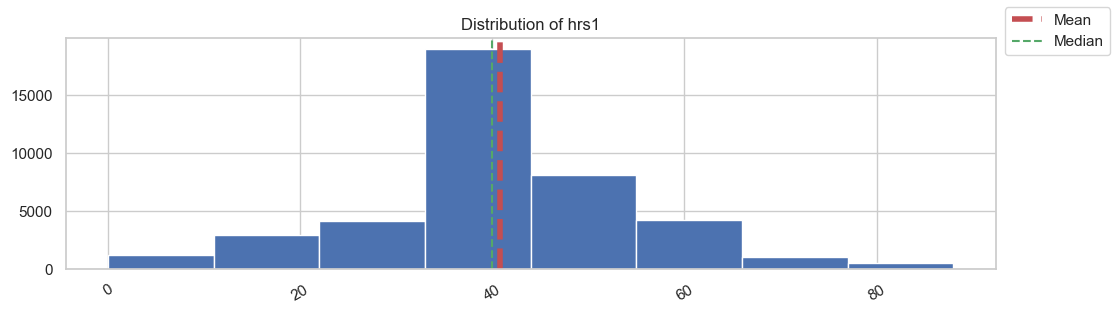

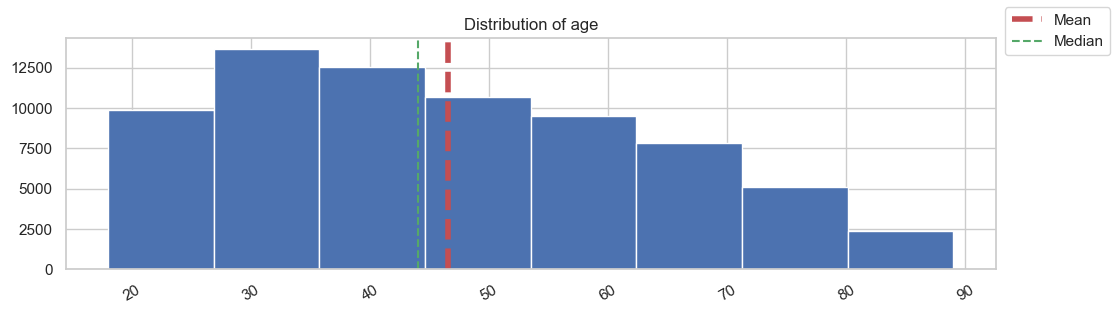

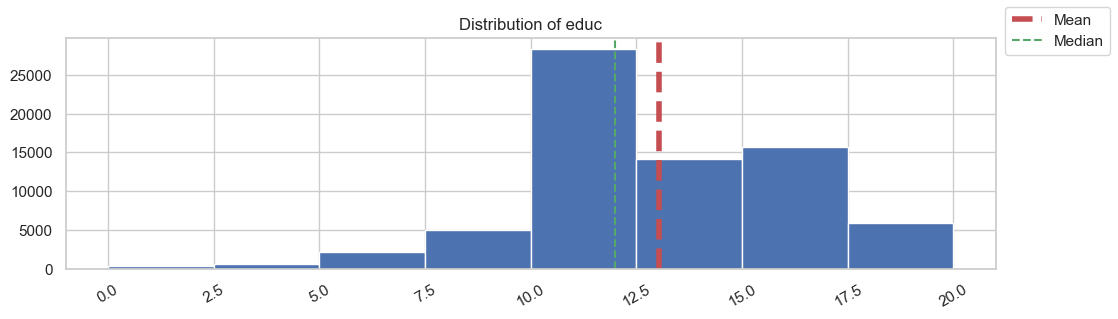

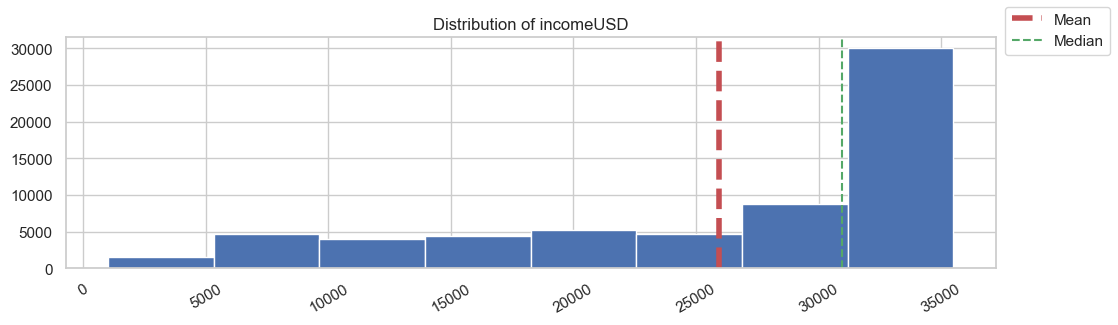

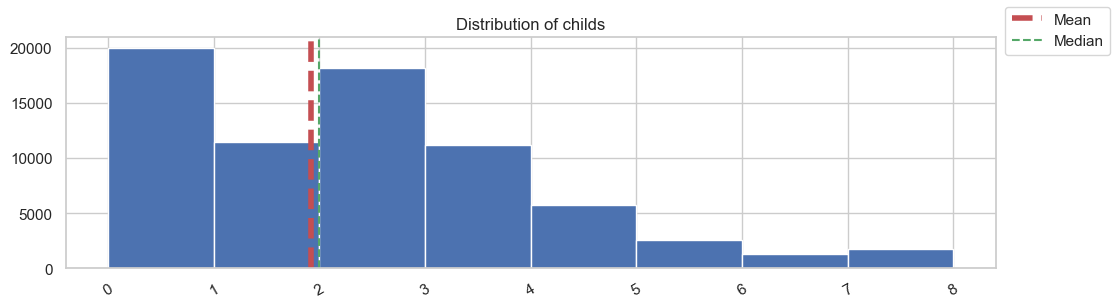

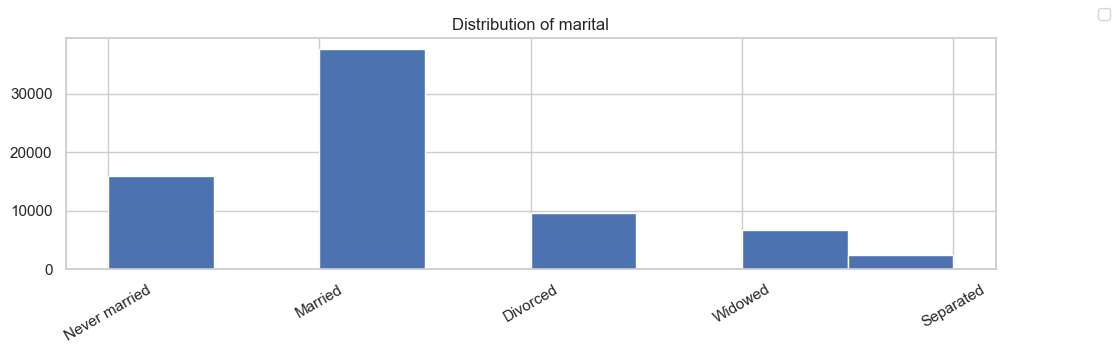

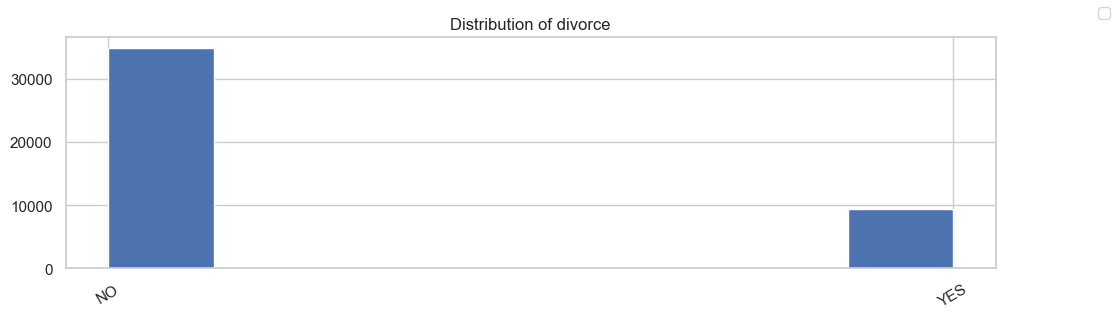

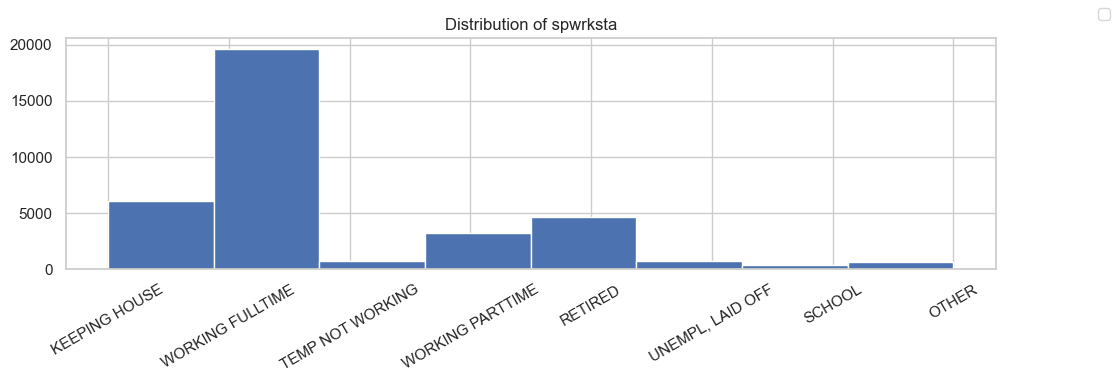

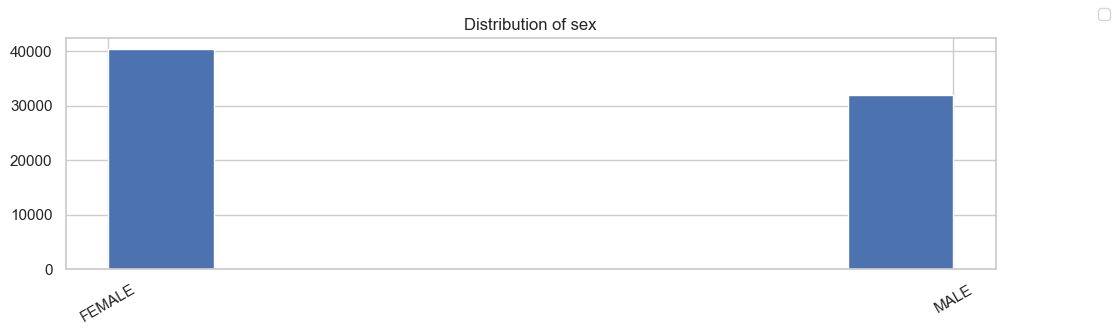

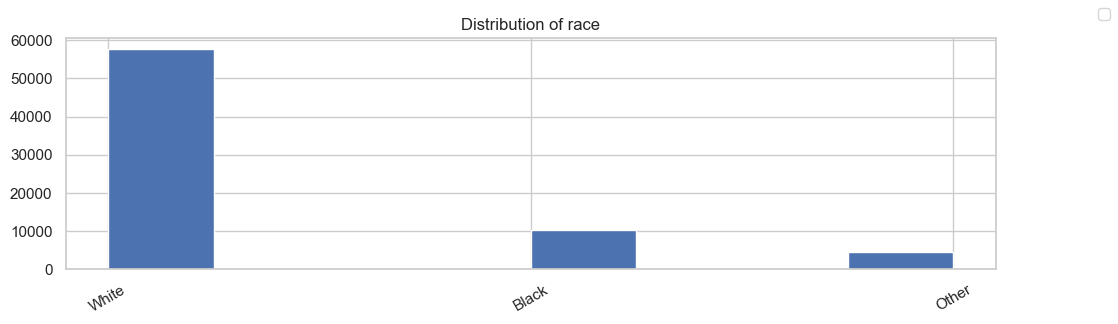

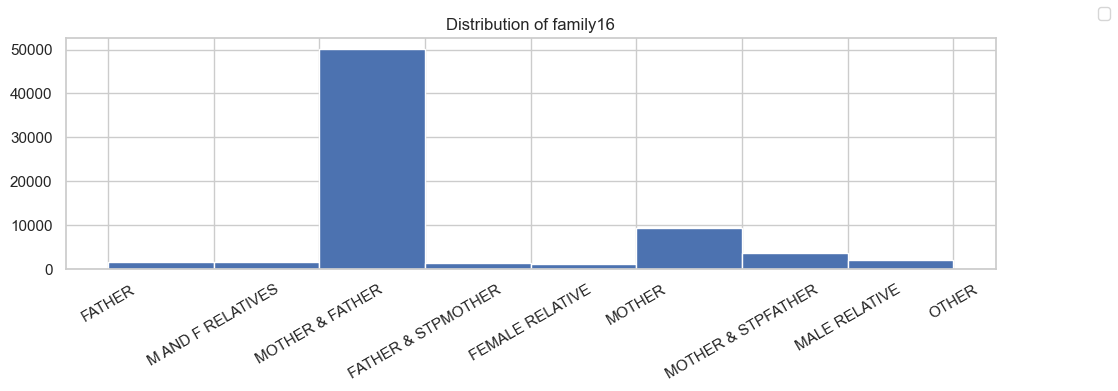

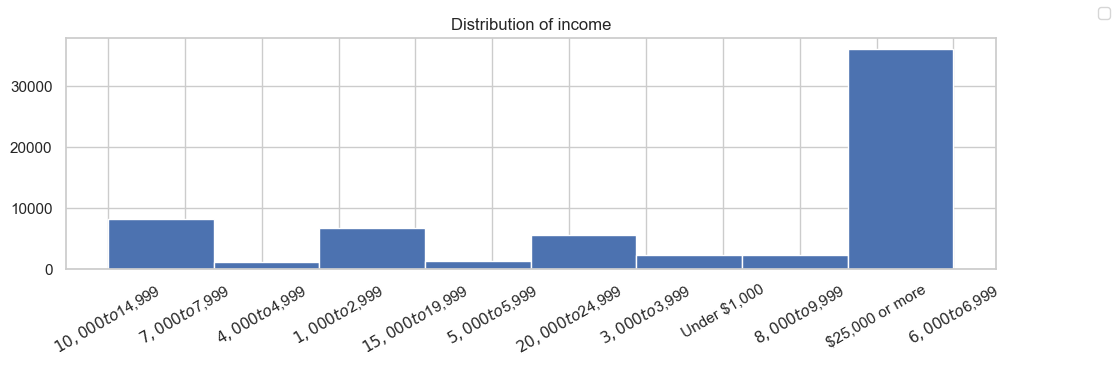

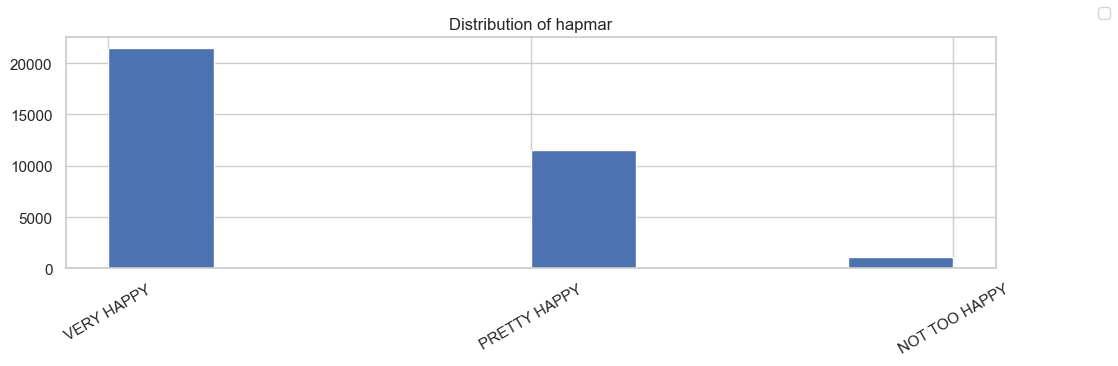

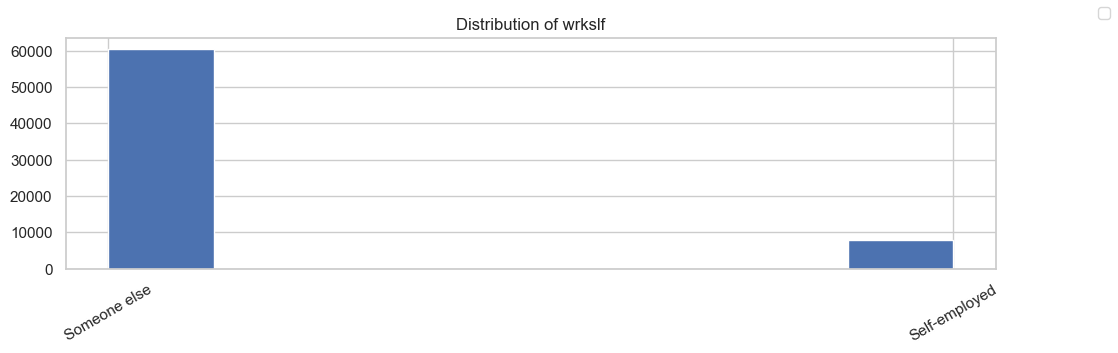

In [85]:
#Index(['year', 'id_', 'hrs1', 'wrkslf', 'marital', 'divorce', 'spwrksta',_
#'childs', 'age', 'educ', 'spdeg', 'sex', 'race', 'family16', 'income',
#       'relig16', 'hapmar', 'ballot', 'hsr1'],
#      dtype='object')

# Plot histograms of the height, weight, and age data
#dataset_gss[['hrs1', 'wrkslf', 'marital', 'divorce']].hist(figsize=(5, 5))
    # Add mean and median lines
        
    
for column in ['hrs1', 'age', 'educ','incomeUSD', 'childs', 'marital', 'divorce', 'spwrksta',
                 'sex', 'race', 'family16', 'income',
               'hapmar','wrkslf' ]:
    fig, ax = plt.subplots()
    dataset_gss[column].hist(ax=ax, bins=8, figsize=(12, 3))
    plt.title(f"Distribution of {column}")
    
    if is_numeric(dataset_gss[column]):            
        ax.axvline(dataset_gss[column].mean(), color='r', linestyle='dashed', label='Mean', linewidth = 4)
        ax.axvline(dataset_gss[column].median(), color='g', linestyle='dashed', label='Median')

    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc="upper right")
    # Rotate x-axis labels by 30 degrees
    plt.xticks(rotation=30)
    plt.show()

### Identifying the outliers

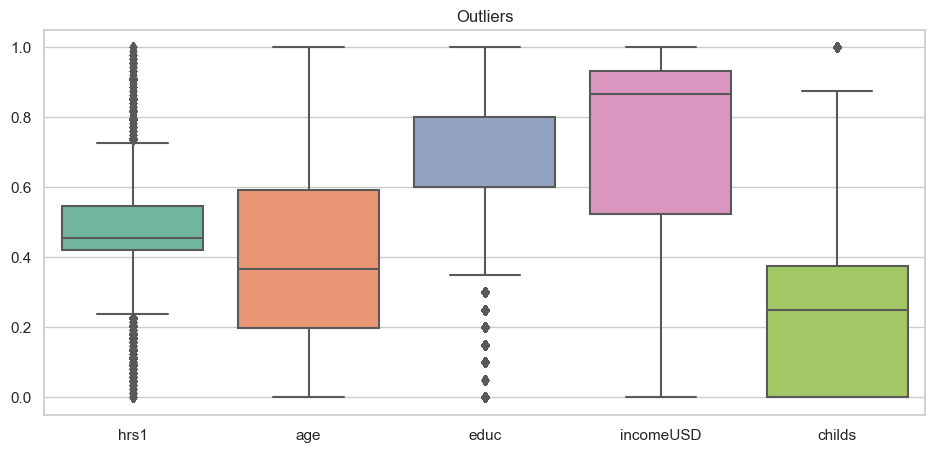

In [54]:
#Plotting the outliers of 5 numeric variables

# Load the dataset
dataset = dataset_gss[['hrs1', 'age', 'educ',  'incomeUSD','childs']]

df = dataset

scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Create box plots for each normalized numerical variable
plt.figure(figsize=(25, 5))
sns.set(style="whitegrid")
plt.subplot(1, 2,2)
box_plot = sns.boxplot(data=df_normalized, palette="Set2")
plt.title('Outliers')

# Adding legend
# Create a custom legend
legend_labels = ['hrs1', 'age', 'educ', 'incomeUSD', 'childs']
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=sns.color_palette("Set2")[i], markersize=10) for i in range(len(legend_labels))]

#plt.legend(legend_handles, legend_labels, loc='right')

plt.show()

# Create scatter plots for each normalized numerical variable
#plt.subplot(1, 2, 2)
#sns.pairplot(dataset_gss)
#plt.title('Scatter Plot of Normalized Numerical Variables')

#plt.tight_layout()
#plt.show()

### Plotting histogram of divorced population

In [55]:
# Filtering the dataset based on fivorce status
ds_divorced = dataset_gss[dataset_gss.divorce == 'YES']

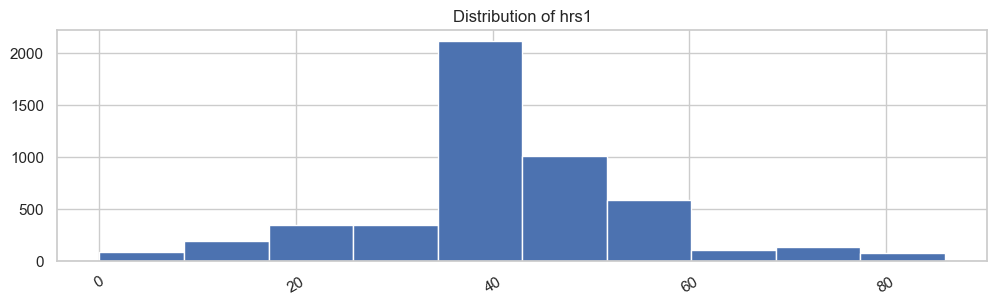

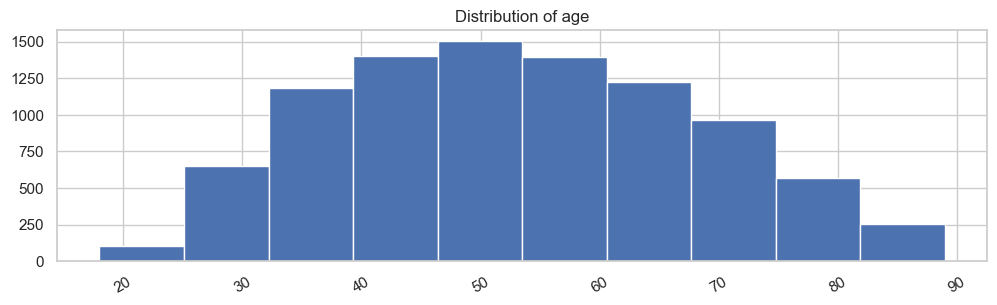

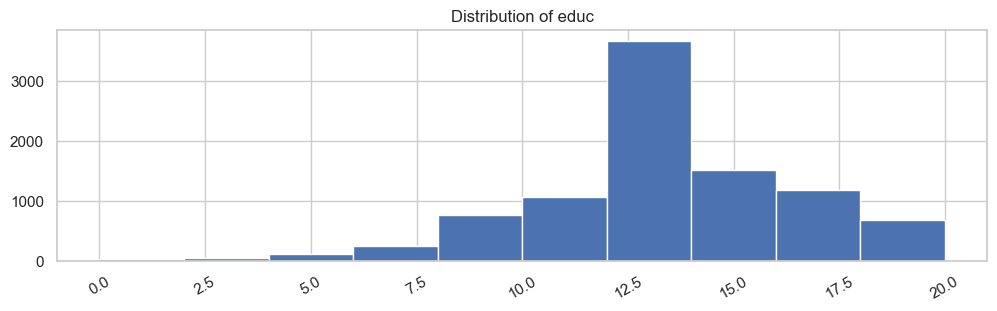

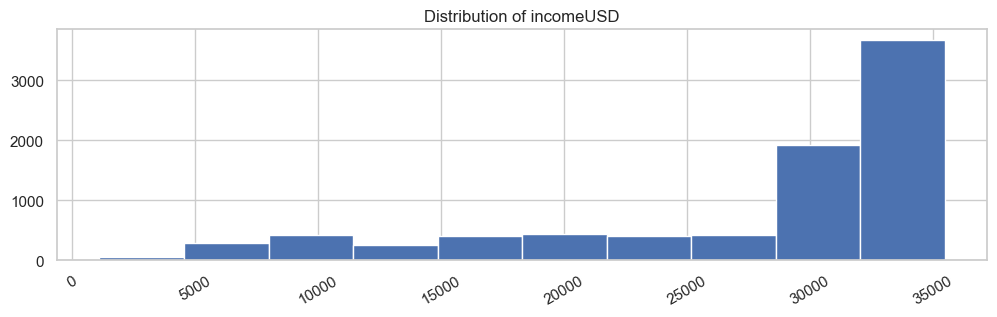

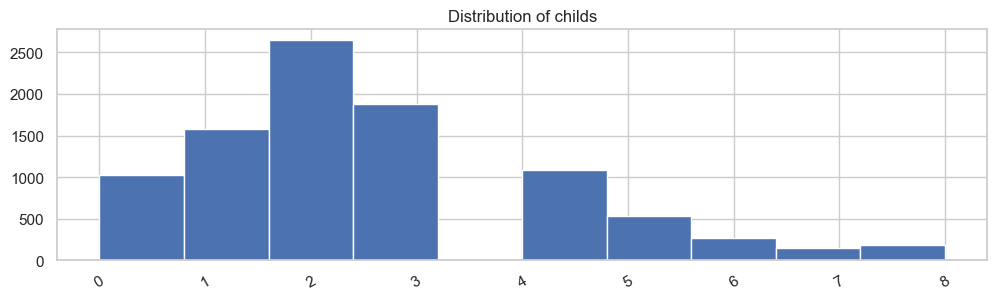

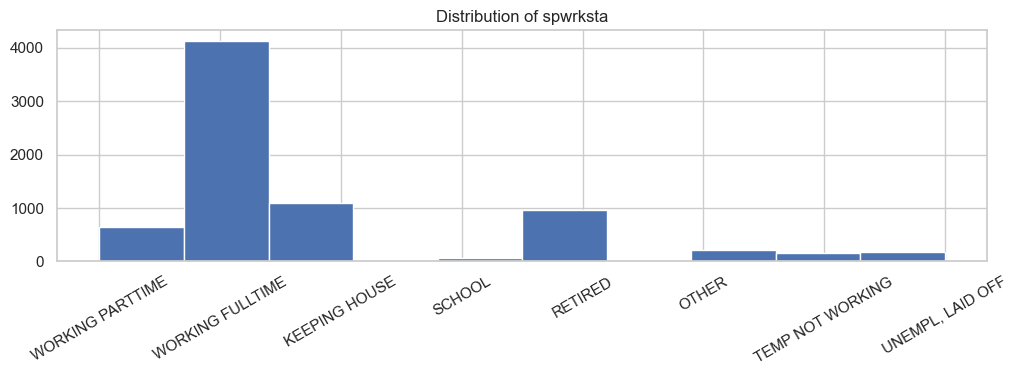

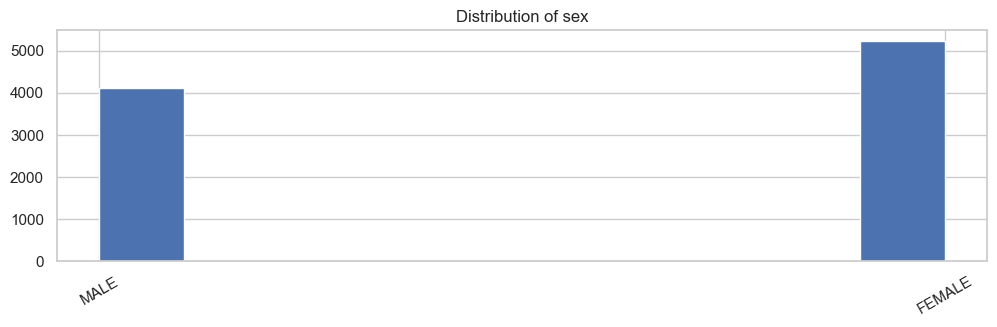

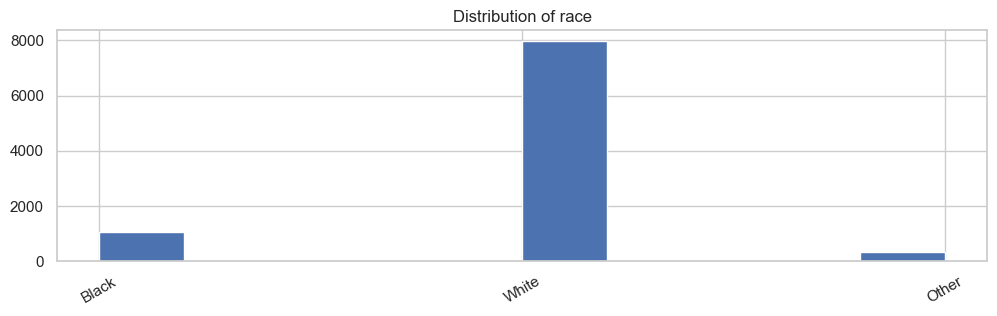

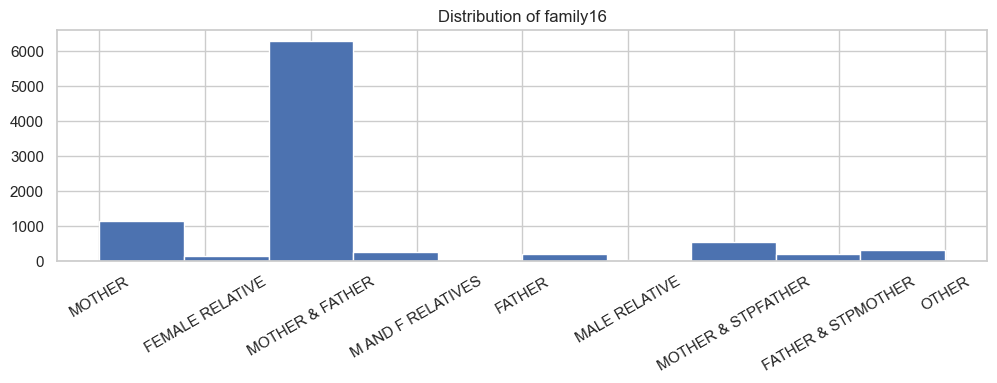

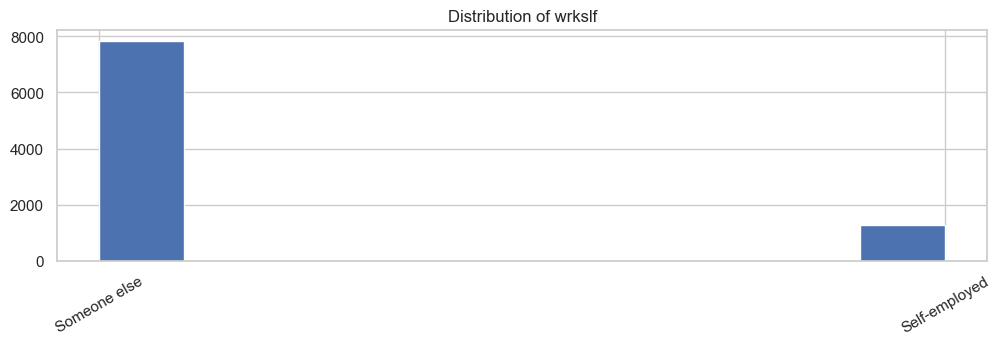

In [56]:

for column in ['hrs1', 'age', 'educ',  'incomeUSD','childs', 'spwrksta',
                 'sex', 'race', 'family16','wrkslf']:
    fig, ax = plt.subplots()
    ds_divorced[column].hist(ax=ax, bins=10, figsize=(12, 3))
    plt.title(f"Distribution of {column}")
 
    # Rotate x-axis labels by 30 degrees
    plt.xticks(rotation=30)
    
    plt.show()
    #hist = thinkstats2.Hist(ds_divorced[column])
    #thinkplot.Hist(hist)

### Two scenario comparison by using PMF

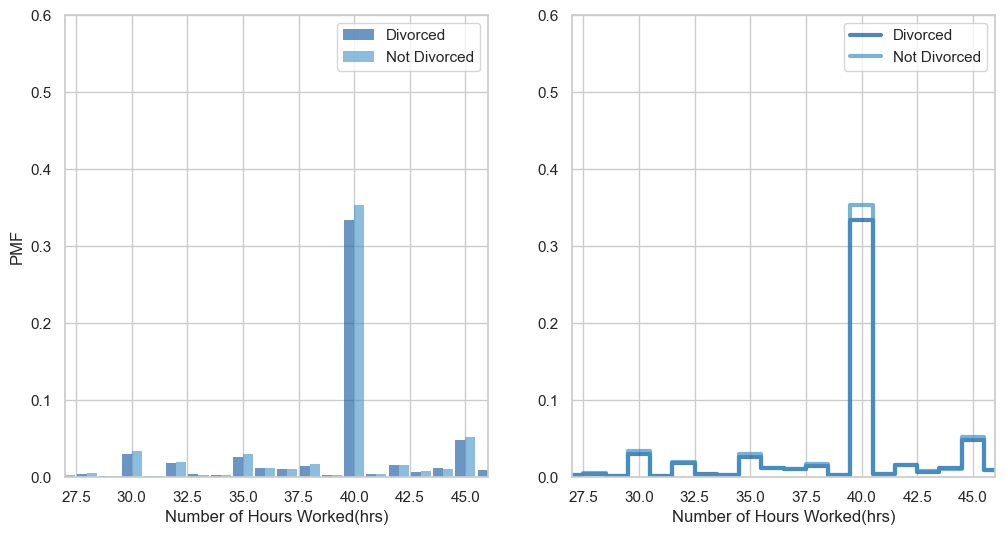

In [57]:
ds_divorced = dataset_gss[dataset_gss.divorce == 'YES']
ds_NOTdivorced = dataset_gss[dataset_gss.divorce != 'YES']

first_pmf = thinkstats2.Pmf(ds_divorced['hrs1'], label="Divorced")
other_pmf = thinkstats2.Pmf(ds_NOTdivorced['hrs1'], label="Not Divorced")

width = 0.45
axis = [27, 46, 0, 0.6]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(first_pmf, align="right", width=width)
thinkplot.Hist(other_pmf, align="left", width=width)
thinkplot.Config(xlabel="Number of Hours Worked(hrs)", ylabel="PMF", axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([first_pmf, other_pmf])
thinkplot.Config(xlabel="Number of Hours Worked(hrs)", axis=axis)

### Calculating PMF and CDF 

In [58]:
def PlotCDFAndPMF(dataset, xlabel):
    cdf = thinkstats2.Cdf(dataset)    

    #     Calculate PMF
    pmf = thinkstats2.Pmf(dataset)

    # Create a figure with two subplots
    fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))

    # Plot CDF on the first subplot
    thinkplot.Cdf(cdf, label='CDF')
    ax1.set_xlabel(xlabel)
    ax1.set_title("CDF + PMF")
    ax1.set_ylabel("Probability")

    # Plot PMF on the second subplot
    thinkplot.Pmf(pmf, label='PMF', color='green')

    # Adjust layout and display the plots
    lines, labels = ax1.get_legend_handles_labels()
    #lines2, labels2 = ax2.get_legend_handles_labels()    
    ax1.legend(lines , labels , loc="upper right")    

    plt.tight_layout()
    plt.show()
  

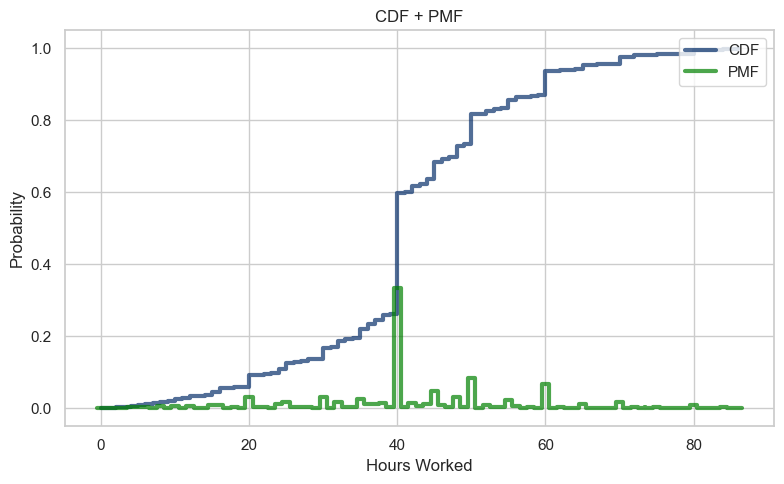

In [59]:
PlotCDFAndPMF(ds_divorced['hrs1'],"Hours Worked")

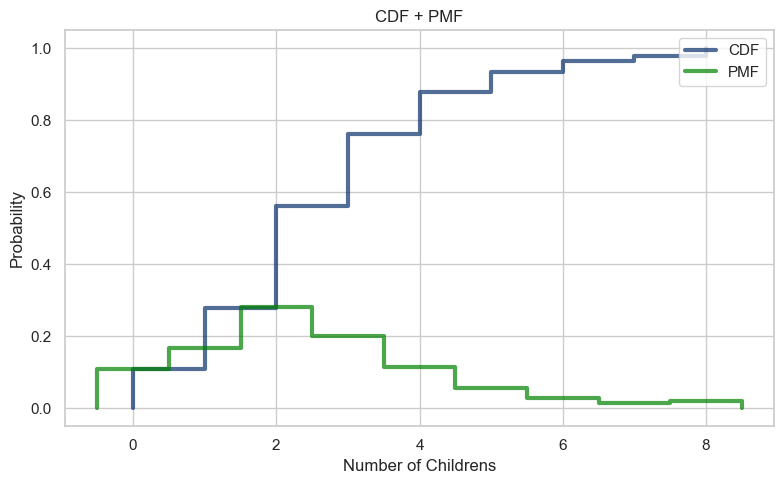

In [60]:
#['hrs1', 'wrkslf', 'spwrksta', 'childs', 'age', 'educ', 'sex', 'race', 'family16', 'income']
PlotCDFAndPMF(ds_divorced['childs'],"Number of Childrens")
#cdf = thinkstats2.Cdf(ds_divorced['childs'])
#thinkplot.Cdf(cdf)
#thinkplot.Show(xlabel="Number of Childrens")

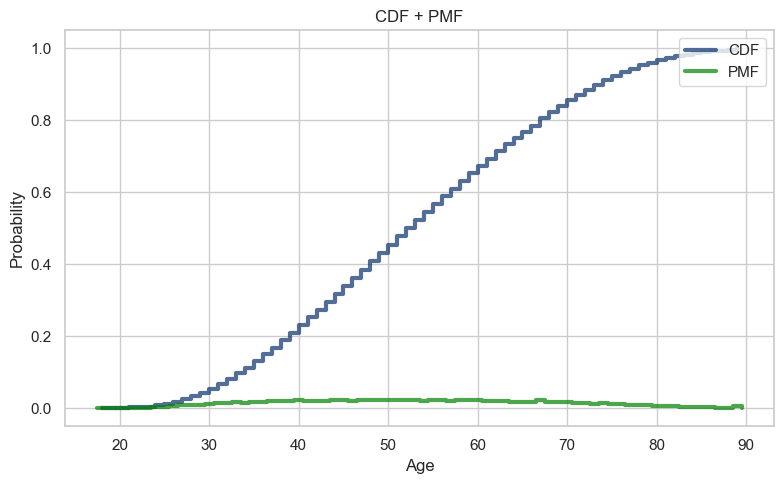

In [61]:
#['hrs1', 'wrkslf', 'spwrksta', 'childs', 'age', 'educ', 'sex', 'race', 'family16', 'income']

#cdf = thinkstats2.Cdf(ds_divorced['age'])
#thinkplot.Cdf(cdf)
#thinkplot.Show(xlabel="Age")
PlotCDFAndPMF(ds_divorced['age'],"Age")

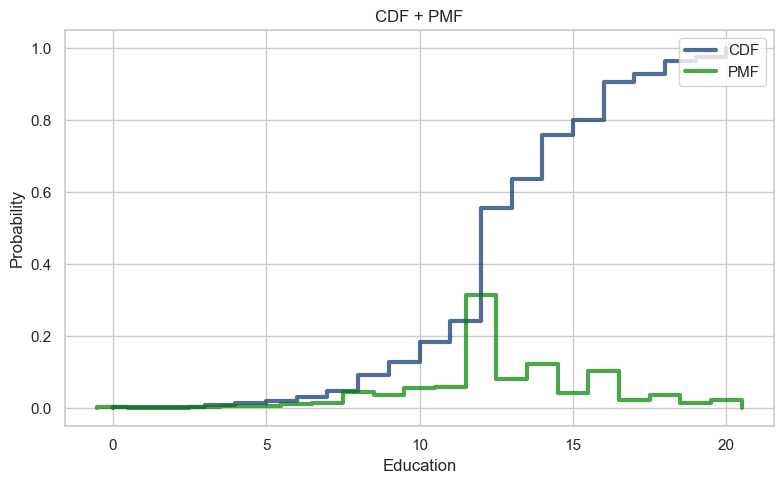

In [62]:
#['hrs1', 'wrkslf', 'spwrksta', 'childs', 'age', 'educ', 'sex', 'race', 'family16', 'income']

PlotCDFAndPMF(ds_divorced['educ'],"Education")

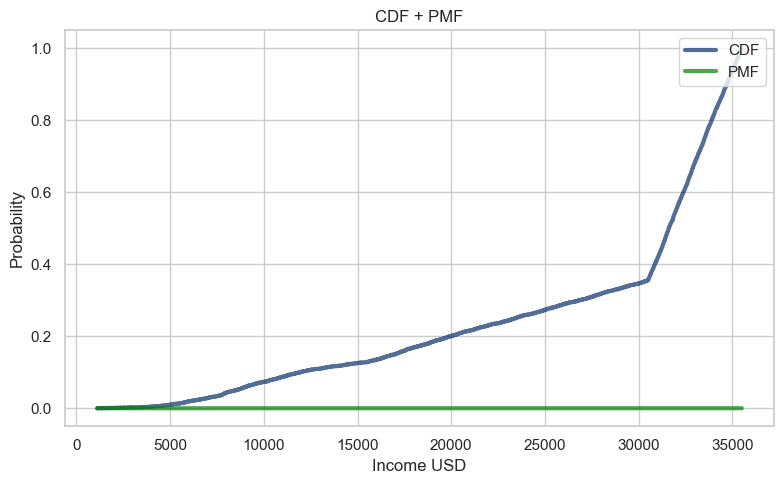

In [63]:
PlotCDFAndPMF(ds_divorced['incomeUSD'],"Income USD")

### Analytical distribution

In [64]:
def PlotCDFAnalytical(dataset, xlabel):
    cdf = thinkstats2.Cdf(dataset)    
    thinkplot.Cdf(cdf, label='CDF')
    thinkplot.Show(xlabel=xlabel, ylabel='CCDF', yscale='log')
    

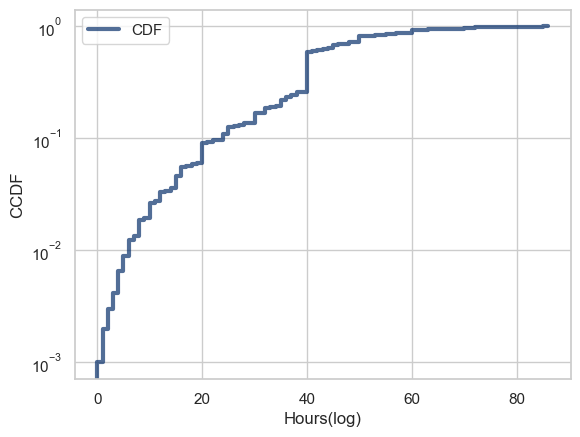

<Figure size 800x600 with 0 Axes>

In [65]:
PlotCDFAnalytical(ds_divorced['hrs1'],"Hours(log)")

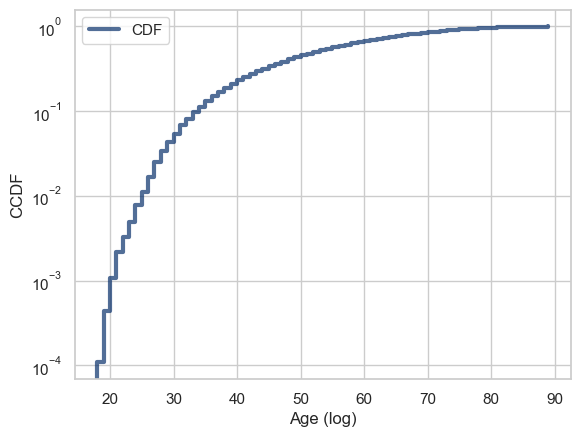

<Figure size 800x600 with 0 Axes>

In [66]:
PlotCDFAnalytical(ds_divorced['age'],"Age (log)")

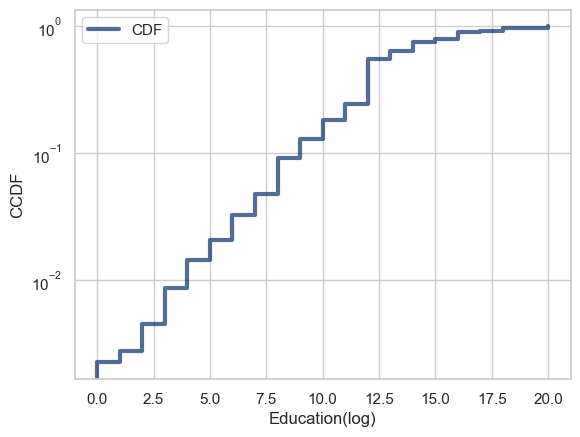

<Figure size 800x600 with 0 Axes>

In [67]:
PlotCDFAnalytical(ds_divorced['educ'],"Education(log)")

### Scatter plot of different variables

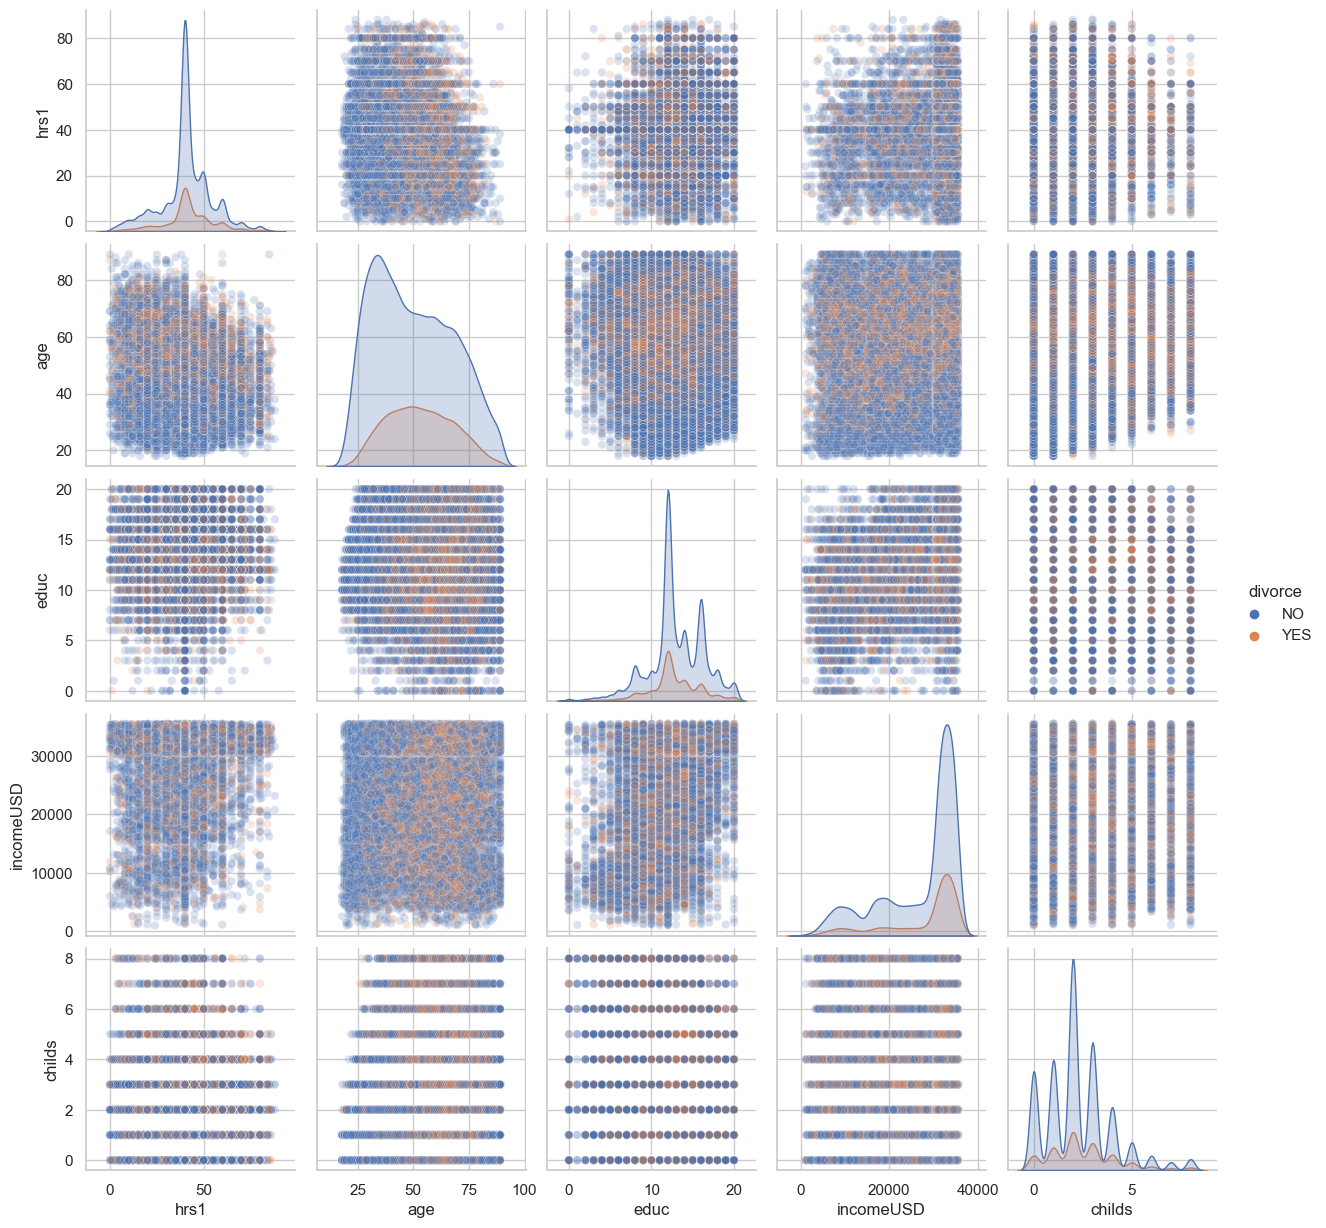

In [68]:
#Plotting scatter plot of different variables
#the blue shows not divorced, the orange shows the divorce

# Load the dataset
dataset = dataset_gss[['divorce','hrs1', 'age', 'educ',  'incomeUSD','childs', 'spwrksta',
                 'sex', 'race', 'family16','wrkslf']]

df = dataset.copy()

# Set the style for the plots (optional, just for aesthetics)
sns.set(style='whitegrid')

# Create a pair plot
sns.pairplot(df,  diag_kind='kde', hue='divorce',  plot_kws={'alpha': 0.2})

# Show the plot
plt.show()

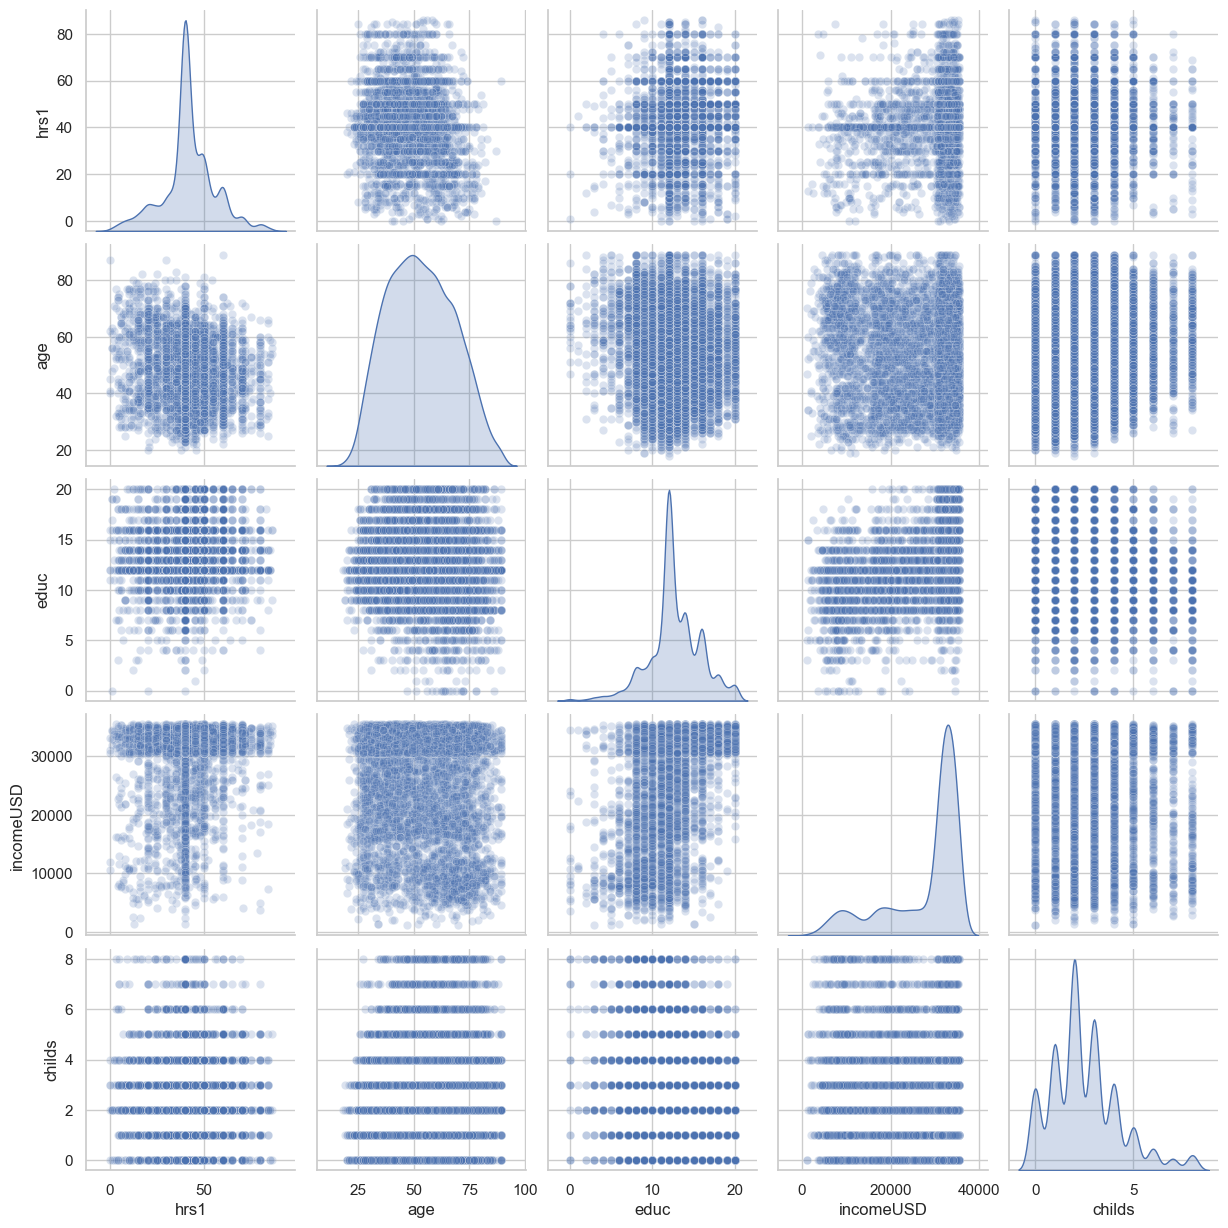

In [69]:
#Plotting scatter plot of divorce  variables

dataset = ds_divorced[['divorce','hrs1', 'age', 'educ',  'incomeUSD','childs', 'spwrksta',
                 'sex', 'race', 'family16','wrkslf']]

df = dataset

# Set the style for the plots (optional, just for aesthetics)
sns.set(style='whitegrid')

# Create a pair plot
sns.pairplot(df,  diag_kind='kde',  plot_kws={'alpha': 0.2})

# Show the plot
plt.show()

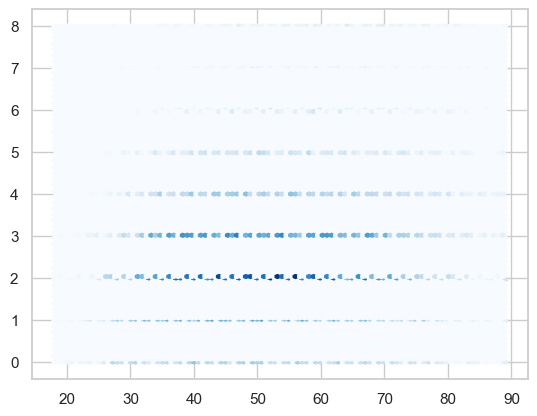

In [70]:
#Hexbin plot, that shows the age and childs relationship for divorced couples
thinkplot.HexBin(ds_divorced['age'],ds_divorced['childs'])
#[['divorce','hrs1', 'age', 'educ',  'incomeUSD','childs', 'spwrksta',
#                 'sex', 'race', 'family16','wrkslf']]

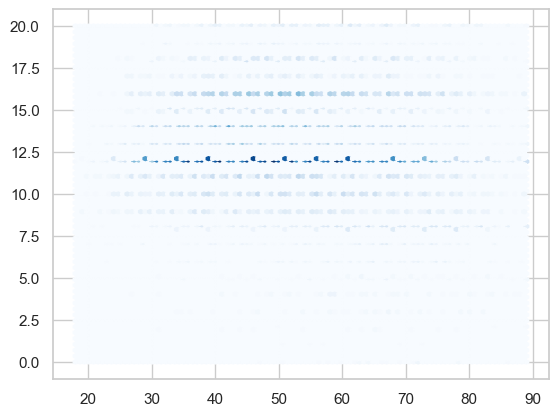

In [71]:
#Hexbin plot, that shows the age and childs relationship for divorced couples
thinkplot.HexBin(ds_divorced['age'],ds_divorced['educ'])
#[['divorce','hrs1', 'age', 'educ',  'incomeUSD','childs', 'spwrksta',
#                 'sex', 'race', 'family16','wrkslf']]

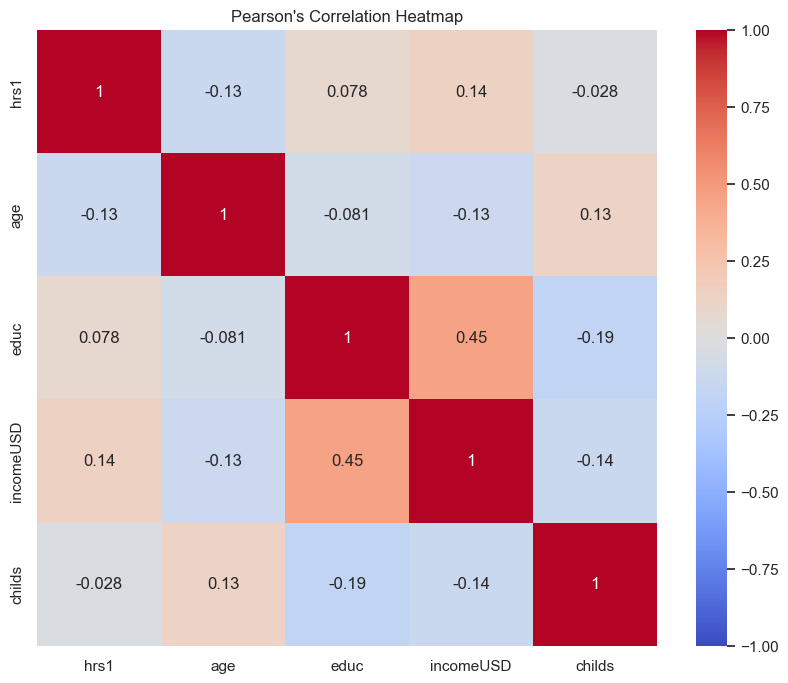

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm

# Load the dataset
dataset = ds_divorced[[ 'hrs1', 'age', 'educ', 'incomeUSD', 'childs']]

# Compute Pearson's correlation matrix
correlation_matrix = dataset.corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Pearson's Correlation Heatmap")
plt.show()




#### Running OLS regression

In [73]:
# Perform regression analysis to assess relationships

dataset_analysis=dataset_gss.copy()
# Convert 'divorce' to integer

# Convert 'divorce' to numeric type and fill NaN with a placeholder value
dataset_analysis['divorce'] = pd.to_numeric(dataset_analysis['divorce'], errors='coerce')
dataset_analysis['divorce'] = dataset_analysis['divorce'].fillna(-999).astype(int)

# Perform regression analysis to assess relationships
y = dataset_analysis['divorce']

X = dataset_analysis[['hrs1', 'age', 'educ', 'incomeUSD', 'childs']]
X = X.replace([np.inf, -np.inf], np.nan).fillna(0)
X = sm.add_constant(X)  # Add a constant term for the intercept
 

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                divorce   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                -1.448e+04
Date:                Sat, 12 Aug 2023   Prob (F-statistic):               1.00
Time:                        11:50:28   Log-Likelihood:             1.8772e+06
No. Observations:               72390   AIC:                        -3.754e+06
Df Residuals:                   72384   BIC:                        -3.754e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -999.0000   2.65e-14  -3.78e+16      0.0

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


### The Null Hypothesis

#### The Null hypothesis 1: There is no co-rellation between divorce and the number of childrens

In [74]:
# Create a DataFrame
df = dataset_gss.copy()

# Create a contingency table
contingency_table = pd.crosstab(df['divorce'], df['childs'])

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Define significance level
alpha = 0.05

# Print the results
print("\nChi-Square:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)

# Compare p-value with significance level
if p < alpha:
    print("\nReject the null hypothesis. There is a significant correlation between divorce and the number of children.")
else:
    print("\nFail to reject the null hypothesis. There is no significant correlation between divorce and the number of children.")


Chi-Square: 212.3517343739779
p-value: 1.5873059852030754e-41
Degrees of Freedom: 8

Reject the null hypothesis. There is a significant correlation between divorce and the number of children.


### <u> Reject the null hypothesis. There is a significant correlation between divorce and the number of children.

#### The Null hypothesis 2: There is no co-rellation between divorce and the number of hours worked in a week

In [75]:
# Create a DataFrame
#[ 'hrs1', 'age', 'educ', 'incomeUSD', 'childs']
# Create a DataFrame
df = dataset_gss.copy()

# Create a contingency table
contingency_table = pd.crosstab(df['divorce'], df['hrs1'])

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Define significance level
alpha = 0.05

# Print the results
print("\nChi-Square:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)

# Compare p-value with significance level
if p < alpha:
    print("\nReject the null hypothesis. There is a significant correlation between divorce and the number of hours worked.")
else:
    print("\nFail to reject the null hypothesis. There is no significant correlation between divorce and the number of hours worked.")


Chi-Square: 103.43880050111484
p-value: 0.12476633823367769
Degrees of Freedom: 88

Fail to reject the null hypothesis. There is no significant correlation between divorce and the number of hours worked.


### <u> Fail to reject the null hypothesis. There is no significant correlation between divorce and the number of hours worked.

## Logistic Regression

In [76]:
# Check if the column is numeric
def is_numeric(column):
    return pd.api.types.is_numeric_dtype(column)

# Impute the missing values
def impute_missing_values(df):
    for column in df.columns:
        if is_numeric(column):
            imputer = SimpleImputer(missing_values='NaN', strategy='mean')
            df[column] = imputer.fit_transform(df[column].values.reshape(-1, 1))
        else:
            #df[column] = df[column].fillna('missing')
            a=2

# Impute the missing values in the dataset

In [77]:
dataset_gss


year   id_  hrs1        wrkslf        marital divorce  \
0      1972     1   NaN  Someone else  Never married     NaN   
1      1972     2   NaN  Someone else        Married      NO   
2      1972     3   NaN  Someone else        Married      NO   
3      1972     4   NaN  Someone else        Married      NO   
4      1972     5   NaN  Someone else        Married      NO   
...     ...   ...   ...           ...            ...     ...   
72385  2022  3541  48.0  Someone else  Never married     NaN   
72386  2022  3542  50.0  Someone else        Married     YES   
72387  2022  3543  38.0  Someone else  Never married     NaN   
72388  2022  3544  40.0  Someone else        Married      NO   
72389  2022  3545  40.0  Someone else        Married      NO   

               spwrksta  childs   age  educ        spdeg     sex   race  \
0                   NaN     0.0  23.0  16.0          NaN  FEMALE  White   
1         KEEPING HOUSE     5.0  70.0  10.0  HIGH SCHOOL    MALE  White   
2      WORKING FULLTIME     4.0  48.0  12.0          NaN  FEMALE  White   
3      WORKING FULLTIME     0.0  27.0  17.0     GRADUATE  FEMALE  White   
4      TEMP NOT WORKING     2.0  61.0  12.0  HIGH SCHOOL  FEMALE  White   
...                 ...     ...   ...   ...          ...     ...    ...   
72385               NaN     0.0  22.0  12.0          NaN  FEMALE  White   
72386               NaN     2.0  29.0  19.0          NaN  FEMALE  White   
72387               NaN     1.0  32.0  15.0          NaN    MALE  White   
72388               NaN     0.0  49.0  17.0          NaN  FEMALE  White   
72389               NaN     1.0  50.0  20.0          NaN    MALE  White   

                 family16           income relig16        hapmar    ballot  \
0                  FATHER              NaN     NaN           NaN      <NA>   
1       M AND F RELATIVES              NaN     NaN           NaN      <NA>   
2         MOTHER & FATHER              NaN     NaN           NaN      <NA>   
3         MOTHER & FATHER              NaN     NaN           NaN      <NA>   
4         MOTHER & FATHER              NaN     NaN           NaN      <NA>   
...                   ...              ...     ...           ...       ...   
72385  MOTHER & STPFATHER  $25,000 or more     NaN           NaN  Ballot a   
72386     MOTHER & FATHER  $25,000 or more     NaN    VERY HAPPY  Ballot a   
72387  MOTHER & STPFATHER  $25,000 or more     NaN           NaN  Ballot b   
72388     MOTHER & FATHER  $25,000 or more     NaN    VERY HAPPY  Ballot c   
72389     MOTHER & FATHER  $25,000 or more     NaN  PRETTY HAPPY  Ballot b   

         incomeUSD  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  
...            ...  
72385  34122.01613  
72386  34327.73258  
72387  31031.78631  
72388  31998.70139  
72389  34308.24662  

[72390 rows x 19 columns]

In [78]:
# Create the dependent variable
df = dataset_gss.copy()
# Create the independent variables
df = df.drop('id_', axis=1)
df = df.drop('ballot', axis=1)
df = df.drop('year', axis=1)
#df = df.drop('marital', axis=1)



data = df
# Impute NaN values with the mean for numeric columns and the mode for categorical columns
for col in data.columns:
    if data[col].dtype.name == "float64":
        data[col].fillna(data[col].mean(), inplace=True)
    elif not pd.api.types.is_numeric_dtype(data[col]):
        data = pd.get_dummies(data, columns=[col])
        #print(col) 
        
        # Split the data into training and testing sets
data = data.drop('divorce_NO', axis=1)
#X_train, X_test, y_train, y_test = train_test_split(data.drop(columns="marital_Divorced"), data["marital_Divorced"], test_size=0.25)
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns="divorce_YES"), data["divorce_YES"], test_size=0.25)


# Create a logistic regression model
log_reg = LogisticRegression(max_iter =10000)

# Fit the model to the training data
result= log_reg.fit(X_train, y_train)

# Make predictions on the testing data
predictions = log_reg.predict(X_test)

# Calculate the accuracy of the model
accuracy = np.mean(predictions == y_test)

print("The accuracy of the model is:", accuracy)

The accuracy of the model is: 0.8681622278704829


In [79]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
# Scale the input features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Ridge regression model with alpha parameter for regularization
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train_scaled, y_train)

# Print coefficients and summary
#print("Ridge Regression Coefficients:")
#for col, coef in zip(X_train.columns, ridge_reg.coef_):
#    print(f"{col}: {coef:.4f}")
    
    
# Using statsmodels to fit the Ridge regression model and print summary
X_train_scaled_with_const = sm.add_constant(X_train_scaled)
ridge_reg_sm = sm.OLS(y_train, X_train_scaled_with_const)
result_sm = ridge_reg_sm.fit()

# Print the summary including coefficients and p-values
print(result_sm.summary())

# Make predictions on the testing data
X_test_scaled_with_const = sm.add_constant(X_test_scaled)
y_pred = result_sm.predict(X_test_scaled_with_const)
y_pred_binary = np.round(y_pred)  # Convert predicted probabilities to binary predictions

# Calculate accuracy
accuracy = np.mean(y_pred_binary == y_test)
print("Accuracy:", accuracy)

# Calculate precision
precision = np.sum((y_pred_binary == 1) & (y_test == 1)) / np.sum(y_pred_binary == 1)
print("Precision:", precision)

# List column names with their p-values
#p_values = result_sm.pvalues[1:]  # Exclude the constant term
#print("\nColumn Names with P-values:")
#for col, p_value in zip(X_train.columns, p_values):
#    print(f"{col}: p-value={p_value:.4f}")

                            OLS Regression Results                            
Dep. Variable:            divorce_YES   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     106.3
Date:                Sat, 12 Aug 2023   Prob (F-statistic):               0.00
Time:                        11:50:30   Log-Likelihood:                -14430.
No. Observations:               54292   AIC:                         2.900e+04
Df Residuals:                   54224   BIC:                         2.960e+04
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1295      0.001     95.526      0.0

C:\Users\aniruddha.joshi\AppData\Local\Temp\ipykernel_25488\2104285088.py:37: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = np.sum((y_pred_binary == 1) & (y_test == 1)) / np.sum(y_pred_binary == 1)


In [80]:
from tabulate import tabulate

# ... (previous code) ...

# List column names with their p-values, coefficients, and R-squared
p_values = result_sm.pvalues[1:]  # Exclude the constant term
coefficients = result_sm.params[1:]  # Exclude the constant term
r_squared = result_sm.rsquared

# Prepare data for tabular format
table_data = []
for col, coef, p_value in zip(X_train.columns, coefficients, p_values):
    table_data.append([col, coef, p_value])

# Add R-squared to the table
table_data.append(['R-squared', r_squared, ''])

# Print column names, coefficients, p-values, and R-squared in tabular format
headers = ["Column Name", "Coefficient", "P-value"]
print("\nSummary:")
print(tabulate(table_data, headers=headers, floatfmt=(".4f", ".4f", ".4f")))


Summary:
Column Name                        Coefficient  P-value
-------------------------------  -------------  ----------------------
hrs1                                    0.0055  7.620459765753077e-05
childs                                  0.0133  1.0707931742194831e-16
age                                     0.0211  7.170395867519049e-30
educ                                   -0.0081  1.0892364007125017e-06
incomeUSD                               0.0076  0.39057106719663826
wrkslf_Self-employed                    0.0207  1.969026992589378e-19
wrkslf_Someone else                     0.0195  1.2257570155047025e-17
marital_Divorced                       -0.0203  0.23154110157380986
marital_Married                         0.0954  0.00022199688382626233
marital_Never married                  -0.0082  0.6954071549873602
marital_Separated                      -0.0100  0.2734943796529368
marital_Widowed                         0.0425  0.003707304727193523
spwrksta_KEEPING HOUSE        